In [1]:
# Import our dependencies
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
import numpy as np

In [2]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from pathlib import Path

In [3]:
bb_players = "combined_ncaa_player_stats.csv"

In [4]:
drafted2_df = pd.read_csv(bb_players)

In [5]:
drafted2_df.head(5)

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,/cbb/players/menghe-anyam-1.html,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,6-5,2.2,2.4,-4.15,3.0,0
1,/cbb/players/jordan-aaberg-1.html,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,6-9,1.6,3.5,-3.07,2.3,0
2,/cbb/players/karl-aaker-1.html,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,6-5,2.3,4.1,1.37,2.0,0
3,/cbb/players/steve-aaker-1.html,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,6-5,3.0,6.2,3.05,5.1,0
4,/cbb/players/waine-aalto-1.html,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,5-10,1.1,3.1,1.63,1.5,0


In [6]:
#drafted2_df["height"].astype(str)
drafted2_df["height"]= drafted2_df["height"].fillna('0-0')

In [7]:
#change height into inches 
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return (12*ft_) + in_
    drafted2_df["height"] = drafted2_df["height"].apply(parse_ht(ht))
print (drafted2_df["height"].apply(lambda x:parse_ht(x)))

0         77.0
1         81.0
2         77.0
3         77.0
4         70.0
          ... 
109656     0.0
109657     0.0
109658    76.0
109659    78.0
109660    80.0
Name: height, Length: 109661, dtype: float64


In [8]:
drafted2_df["height"] = drafted2_df["height"].apply(lambda x:parse_ht(x))
drafted2_df.head()

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,/cbb/players/menghe-anyam-1.html,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,/cbb/players/jordan-aaberg-1.html,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,/cbb/players/karl-aaker-1.html,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,/cbb/players/steve-aaker-1.html,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,/cbb/players/waine-aalto-1.html,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0


In [9]:
#replace nan with 0
drafted2_df= drafted2_df.fillna(0)

In [10]:
drafted2_df.head(5)

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,/cbb/players/menghe-anyam-1.html,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,/cbb/players/jordan-aaberg-1.html,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,/cbb/players/karl-aaker-1.html,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,/cbb/players/steve-aaker-1.html,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,/cbb/players/waine-aalto-1.html,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0


In [11]:
drafted2_df.to_csv("drafted2.csv", encoding="utf-8", index=True)

In [12]:
#assign data to X and Y
#using the features against the is_pro model

X =drafted2_df[['fgapg','fgpct','fgpg','ftapg','ftpct','ftpg','games','height','pfpg','ptspg','sospg','trbpg']]
y = drafted2_df['is_pro'].astype(int)

In [13]:
print("Shape: ", X.shape, y.shape)

Shape:  (109661, 12) (109661,)


In [14]:
#split data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

<b>Random Forest Classifier<b>

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

Feature: 0, Score: 0.06483
Feature: 1, Score: 0.07736
Feature: 2, Score: 0.08404
Feature: 3, Score: 0.05789
Feature: 4, Score: 0.06274
Feature: 5, Score: 0.06091
Feature: 6, Score: 0.09020
Feature: 7, Score: 0.06482
Feature: 8, Score: 0.05213
Feature: 9, Score: 0.10539
Feature: 10, Score: 0.21046
Feature: 11, Score: 0.06924


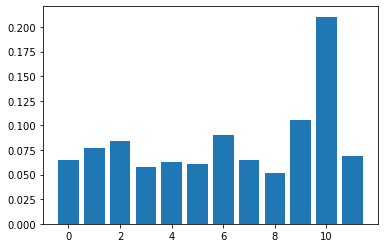

In [16]:
# define dataset
# Feautures and Predicted
X =drafted2_df[['fgapg','fgpct','fgpg','ftapg','ftpct','ftpg','games','height','pfpg','ptspg','sospg','trbpg']]
y = drafted2_df['is_pro'].astype(int)

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<b>Random Forest Regressor - Shap<b>

In [17]:
# train the model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

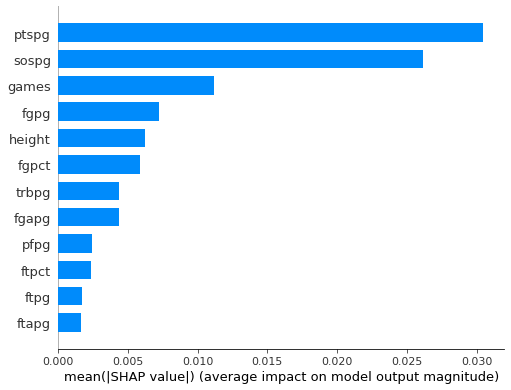

In [32]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [18]:
 # Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9999878412061524
Testing Score: 0.9755981908374671


<b>PCA<b>

In [20]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [21]:
drafted2_scaled = StandardScaler().fit_transform(drafted2_df[['fgapg','fgpct','fgpg','ftapg','ftpct','ftpg','games','height','pfpg','ptspg','sospg','trbpg']])

In [22]:
# Initialize PCA model
pca = PCA(n_components=12)

# Get two principal components for the data.
drafted2_pca = pca.fit_transform(drafted2_scaled)

In [23]:
df_drafted2_pca = pd.DataFrame(
    data=drafted2_pca, columns=['fgapg','fgpct','fgpg','ftapg','ftpct','ftpg','games','height','pfpg','ptspg','sospg','trbpg']
)
df_drafted2_pca.head()

,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg
0,-0.680904,0.374093,0.603662,-0.582684,0.393505,1.066588,0.465609,-0.117691,-0.210306,-0.047609,0.054542,-0.013695
1,-0.134329,1.788874,0.516066,-0.319756,-0.317225,0.771811,-1.138617,-0.002336,-0.058454,-0.224851,0.021175,-0.094334
2,-0.232037,0.995328,-0.599108,-0.577912,-0.182857,1.136123,-0.510853,0.293573,0.437553,0.012866,0.087032,0.070138
3,1.357148,0.114546,-0.802806,-0.284846,0.746772,1.133588,0.698927,-0.297556,0.199717,0.111579,-0.058687,-0.002917
4,-1.334717,0.332830,-0.160516,0.387231,0.524870,-0.200344,0.760060,0.073759,0.153921,-0.080204,-0.117449,0.000479


In [24]:
 # Fetch the explained variance
pca.explained_variance_ratio_

array([5.22109599e-01, 1.02488742e-01, 8.49637847e-02, 7.32142363e-02,
       6.30539889e-02, 4.72941149e-02, 4.40267459e-02, 2.86778030e-02,
       2.49483890e-02, 6.43092947e-03, 2.33985032e-03, 4.51816387e-04])

<b>K Means<b>

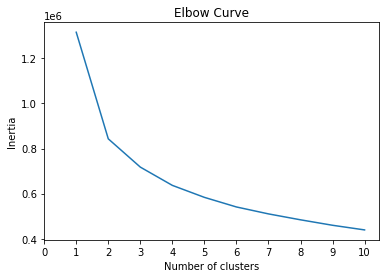

In [25]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_drafted2_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [26]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_drafted2_pca)

# Predict clusters
predictions = model.predict(df_drafted2_pca)

# Add the predicted class column to the dataframe
df_drafted2_pca['is_pro'] = model.labels_
df_drafted2_pca.head()

,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,-0.680904,0.374093,0.603662,-0.582684,0.393505,1.066588,0.465609,-0.117691,-0.210306,-0.047609,0.054542,-0.013695,2
1,-0.134329,1.788874,0.516066,-0.319756,-0.317225,0.771811,-1.138617,-0.002336,-0.058454,-0.224851,0.021175,-0.094334,2
2,-0.232037,0.995328,-0.599108,-0.577912,-0.182857,1.136123,-0.510853,0.293573,0.437553,0.012866,0.087032,0.070138,2
3,1.357148,0.114546,-0.802806,-0.284846,0.746772,1.133588,0.698927,-0.297556,0.199717,0.111579,-0.058687,-0.002917,2
4,-1.334717,0.332830,-0.160516,0.387231,0.524870,-0.200344,0.760060,0.073759,0.153921,-0.080204,-0.117449,0.000479,1


<b>Tensor Flow<b>

In [27]:
import tensorflow as tf

In [28]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()


In [29]:
n_features = X.shape[1]

In [30]:
 # Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=n_features))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
2571/2571 [==============================] - 2s 664us/step - loss: 0.0923 - accuracy: 0.9714
Epoch 2/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.0707 - accuracy: 0.9736
Epoch 3/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.0694 - accuracy: 0.9737
Epoch 4/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.0686 - accuracy: 0.9737
Epoch 5/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.0681 - accuracy: 0.9738
Epoch 6/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.0677 - accuracy: 0.9739
Epoch 7/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.0676 - accuracy: 0.9743
Epoch 8/50
2571/2571 [==============================] - 3s 1ms/step - loss: 0.0670 - accuracy: 0.9741
Epoch 9/50
2571/2571 [==============================] - 4s 2ms/step - loss: 0.0668 - accuracy: 0.9746
Epoch 10/50
2571/2571 [==============================] - 4s 2ms/step - loss: 0.0

<AxesSubplot:>

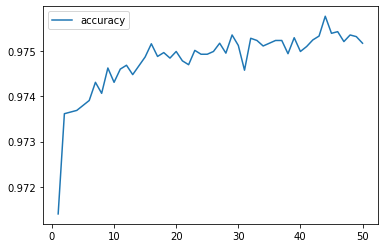

In [31]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy") 